In [1]:
import os, io, cProfile, pstats, pickle, shutil

import sys
import igl
import meshplot as plot
import pickle
from init_cm_data import *
from conformal_impl.optimization import *
from conformal_impl.layout import *
from conformal_py import *
from optimization_py import *
from scipy.sparse import csr_matrix
from conformal_impl.finite_diff import *
import conformal_impl.functions_with_jacobians as FWJ
import script_conformal
from conformal_py import *
from conformal_impl.meshgen import *
%load_ext autoreload
%autoreload 2



In [2]:
import os, io, cProfile, pstats, pickle, shutil
import numpy as np
import sys
import igl
import meshplot as plot
import pickle


module_dir = '../../hanxiao/ConformalIdealDelaunay/py'
sys.path.append(module_dir)
import hanxiao_py as hcp
from optimization_py import *


In [3]:
import pandas as pd
output_dir = '../output/paper/cut-Myles-opt'
csv_path = os.path.join(output_dir, 'cut_opt_energies.csv')
energies_df = pd.read_csv(csv_path, header=0, index_col=0)

In [30]:
csv_paths = ['../output/paper/closed-Myles-opt/closed_opt_energies.csv',
             '../output/paper/open-Myles-opt/open_opt_energies.csv']
key='max_stretch'
stretches = []
for csv_path in csv_paths:
    energies_df = pd.read_csv(csv_path, header=0, index_col=0)
    stretches += list(energies_df[key])



In [31]:
csv_paths = ['../output/paper/cut-Myles-opt/cut_opt_energies.csv',
               '../output/paper/closed-Myles-opt/closed_opt_energies.csv',
               '../output/paper/open-Myles-opt/open_opt_energies.csv']

stretches = []
for csv_path in csv_paths:
    energies_df = pd.read_csv(csv_path, header=0, index_col=0)
    stretches += list(energies_df['norm_stretch'])
#hist = np.histogram(stretches)


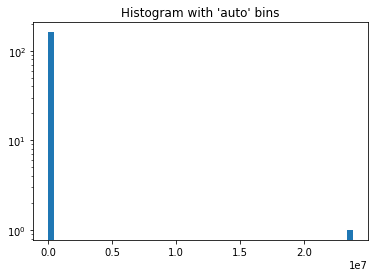

In [32]:
import matplotlib.pyplot as plt
X = np.log(np.log(stretches))
X = stretches
plt.hist(X, bins=50, log=True,)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [33]:
csv_paths = ['../output/paper/closed-Myles-conf/closed_conf_energies.csv',
               '../output/paper/open-Myles-conf/open_conf_energies.csv']

stretches = []
for csv_path in csv_paths:
    energies_df = pd.read_csv(csv_path, header=0, index_col=0)
    stretches += list(energies_df[key])
#hist = np.histogram(stretches)


In [34]:
csv_paths = ['../output/paper/cut-Myles-conf/cut_conf_energies.csv',
               '../output/paper/closed-Myles-conf/closed_conf_energies.csv',
               '../output/paper/open-Myles-conf/open_conf_energies.csv']

stretches = []
for csv_path in csv_paths:
    energies_df = pd.read_csv(csv_path, header=0, index_col=0)
    stretches += list(energies_df[key])
#hist = np.histogram(stretches)


In [13]:
def histogram_data(models, output_dir):
    all_us=[]
    all_stretches=[]
    for m in models:
#        if (m == 'vh_skin'):
#            continue
        pickle_path = os.path.join(output_dir, m+'_record.p')
        try:
            with open(pickle_path, 'rb') as f:
                record = pickle.load(f)
                v = record['v']
                f = record['f']
                Th_hat = record['Th_hat']
                #C, vtx_reindex = fv_to_double(v, f, Th_hat, False)
                #he2e, e2he = build_edge_maps(C)
                #proj, embed = build_refl_proj(C)
                lambdas = np.array(record['lambdas'])
                lambdas_target = np.array(record['lambdas_target'])
                stretches = symmetric_stretches(lambdas, lambdas_target)
                #u = best_fit_conformal(C, lambdas_target[proj], lambdas[proj])
                u = 0
                all_us.append(u)
                all_stretches.append(stretches)
        except FileNotFoundError:
            print("Missing output for {}".format(m))

    return(all_us, all_stretches)
            

In [14]:
def flatten(arr):
    a_flat = []
    for a in arr:
        a_flat = np.concatenate((a, a_flat))

    return a_flat



In [15]:
def get_hist_array(data_dir, opt_output_dir, conf_output_dir):
    files = os.listdir(data_dir)
    models = [f[:-4] for f in files if f.endswith(".obj")]

    all_us_opt, all_stretches_opt = histogram_data(models, opt_output_dir)
    all_us_conf, all_stretches_conf = histogram_data(models, conf_output_dir)

    stretches_opt = flatten(all_stretches_opt)
    #us_opt = flatten(all_us_opt)
    us_opt=0
    stretches_conf = flatten(all_stretches_conf)
    us_opt=0
    #us_conf = flatten(all_us_conf)
    
    return all_us_opt, all_stretches_opt, all_us_conf, all_stretches_conf



In [16]:
X1 = get_hist_array(data_dir = "../data/open-Myles/",
                    opt_output_dir = '../output/paper/open-Myles-opt/',
                    conf_output_dir = '../output/paper/open-Myles-conf/')
X2 = get_hist_array(data_dir = "../data/cut-Myles-simple/",
                   opt_output_dir = '../output/paper/cut-Myles-opt/',
                   conf_output_dir = '../output/paper/cut-Myles-conf/')
X3 = get_hist_array(data_dir = "../data/closed-Myles/",
                   opt_output_dir = '../output/paper/closed-Myles-opt/',
                   conf_output_dir = '../output/paper/closed-Myles-conf/')




In [17]:
len(X1[0]), len(X2[0]), len(X3[0])

(22, 46, 94)

In [18]:
X = X1[1] + X2[1] + X3[1]

In [19]:
len(X)

162

In [20]:
X_max = [np.max(s) for s in X]
X_avg = [np.average(s) for s in X]

(array([[12., 11.,  8.,  3.,  3.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [29., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([  0.21010777,   2.32391995,   4.43773214,   6.55154432,
          8.66535651,  10.77916869,  12.89298087,  15.00679306,
         17.12060524,  19.23441743,  21.34822961,  23.46204179,
         25.57585398,  27.68966616,  29.80347835,  31.91729053,
         34.03110272,  36.1449149 ,  38.25872708,  40.37253927,
         42.48635145,  44.60016364,  46.71397582,  48.827788  ,
         50.94160019,  53.05541237,  55.

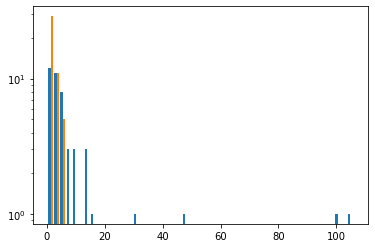

In [20]:
#stretches_avg_opt = [np.average(s) for s in all_stretches_opt]
#stretches_avg_conf = [np.average(s) for s in all_stretches_conf]
stretches_avg_opt = [np.max(s) for s in X2[1]]
stretches_avg_conf = [np.max(s) for s in X2[3]]

stretches_avg_opt = np.log(np.sort(stretches_avg_opt))[:-1]
stretches_avg_conf = np.log(np.sort(stretches_avg_conf))[:-1]

fg, axs = plt.hist([stretches_avg_conf, stretches_avg_opt], log=True, bins=50)
#plt.hist([stretches_conf, stretches_opt], log=True, bins=50)

In [64]:
X_flat = flatten(X)

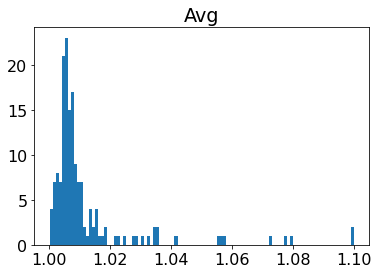

In [21]:
import matplotlib.pyplot as plt
#Y = np.log(np.log(stretches))
#Y = stretches
X_avg = [min(x, 1.1) for x in X_avg]
plt.hist(X_avg, log=False, bins=100)  # arguments are passed to np.histogram
plt.title("Avg")
path = os.path.join('../output', 'avg_stretch.pdf')
plt.savefig(path, format='pdf')

#plt.show()

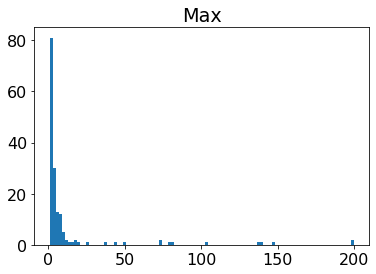

In [22]:
X_max = [min(x, 200) for x in X_max]

plt.hist(X_max, bins=100)  # arguments are passed to np.histogram
plt.title("Max")
#plt.show()
path = os.path.join('../output', 'max_stretch.pdf')
plt.savefig(path, format='pdf')



In [121]:
def plot_log_func(log, key, n):
    Y = []
    for i, log_i in enumerate(log):
        Y.append(log_i[key]) 
        if (i > n):
            plt.plot(Y)
            return
    for i in np.arange(n - len(Y)):
        Y.append(Y[-1])                
    plt.plot(Y, 'r')
    



In [134]:
for z in Z:
    print(len(z))

30
30
30
34
30
34
34
34
34


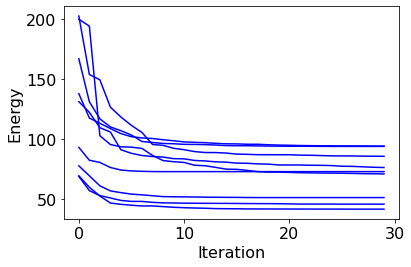

In [11]:
pickle_paths = ['../output/open-Myles-opt/julius_record.p',
                '../output/open-Myles-opt/fish_record.p',
                '../output/open-Myles-opt/amphora_record.p',
                '../output/closed-Myles-opt/camel_record.p',
                '../output/closed-Myles-opt/filigree100k_record.p',
                '../output/closed-Myles-opt/dancer2_record.p',
                '../output/cut-Myles-opt/twirl_record.p',
                '../output/cut-Myles-opt/fertility_tri_record.p',
                '../output/cut-Myles-opt/thai_statue_record.p']
Z = []
n=30
key = 'energy'
for pickle_path in pickle_paths:
    with open(pickle_path, 'rb') as f:
        record = pickle.load(f)
    log = record['log']

    Y = []
    for i, log_i in enumerate(log):
        Y.append(log_i[key]) 
        if (i > n-2):
            break
    for i in np.arange(n - len(Y)):
        Y.append(Y[-1])                
    Z.append(Y)
for z in Z:
    plt.plot(z, 'b')
plt.ylabel('Energy')
plt.xlabel('Iteration')
plt.rc('font', size=16)

plt.tight_layout()

path = os.path.join('../output', 'grad_energy.pdf')
plt.savefig(path, format='pdf')



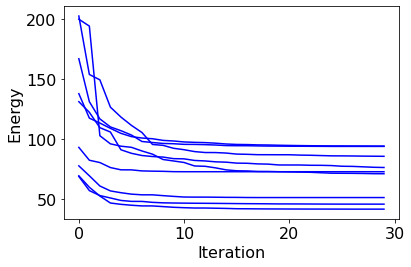

In [26]:
"""
pickle_paths = ['../output/open-Myles-opt/julius_record.p',
                '../output/open-Myles-opt/fish_record.p',
                '../output/open-Myles-opt/amphora_record.p',
                '../output/closed-Myles-opt/camel_record.p',
                '../output/closed-Myles-opt/filigree100k_record.p',
                '../output/closed-Myles-opt/dancer2_record.p',
                '../output/cut-Myles-opt/twirl_record.p',
                '../output/cut-Myles-opt/fertility_tri_record.p',
                '../output/cut-Myles-opt/thai_statue_record.p']
Z = []
n=30
key = 'energy'
for pickle_path in pickle_paths:
    with open(pickle_path, 'rb') as f:
        record = pickle.load(f)
    log = record['log']

    Y = []
    for i, log_i in enumerate(log):
        Y.append(log_i[key]) 
        if (i > n-2):
            break
    for i in np.arange(n - len(Y)):
        Y.append(Y[-1])                
    Z.append(Y)
for z in Z:
    plt.plot(z, 'b')
"""
    
pickle_paths = ['../output/conj_grad/julius_record.p',
            '../output/conj_grad/fish_record.p',
            '../output/conj_grad/amphora_record.p',
            '../output/conj_grad/camel_record.p',
            '../output/conj_grad/filigree100k_record.p',
            '../output/conj_grad/dancer2_record.p',
            '../output/conj_grad/twirl_record.p',
            '../output/conj_grad/fertility_tri_record.p',
            '../output/conj_grad/thai_statue_record.p']
Z = []
n=30
key = 'energy'
for pickle_path in pickle_paths:
    with open(pickle_path, 'rb') as f:
        record = pickle.load(f)
    log = record['log']

    Y = []
    for i, log_i in enumerate(log):
        Y.append(log_i[key]) 
        if (i > n-2):
            break
    for i in np.arange(n - len(Y)):
        Y.append(Y[-1])                
    Z.append(Y)
for z in Z:
    plt.plot(z, 'b')


plt.ylabel('Energy')
plt.xlabel('Iteration')
plt.rc('font', size=16)

plt.tight_layout()

path = os.path.join('../output', 'conj_grad_energy.pdf')
plt.savefig(path, format='pdf')






In [148]:
log

[{'delta_lambdas_norm': 1.5370617026015314,
  'line_search': [{'beta_k': 1.0,
    'energy_step': 20.05949124135881,
    'max_F_step': 0.0012342511456484573,
    'max_stretch_step': 1.1104798473672155,
    'max_stretch_prev_step': 1.0009013168481744,
    'max_stretch_init_step': 1.1104798473672155,
    'energy_proj': 20.064455613086842,
    'max_F_proj': 4.440892098500626e-15,
    'max_stretch_proj': 1.1105713001696182,
    'max_stretch_prev_proj': 1.0008966119939233,
    'max_stretch_init_proj': 1.1105713001696182}],
  'time': 0.07058405876159668,
  'energy_full': 20.064455613086842,
  'energy': 20.064455613086842,
  'opt_energy': 5.907327601680671,
  'max_F': 4.440892098500626e-15,
  'max_metric_distortion': 1.7508180199418337,
  'norm_metric_distortion': 17.546557266021797,
  'max_area_distortion': 7.216302286202201,
  'norm_area_distortion': 54.31547587398031,
  'max_conf_scale': 0.6076835264002136,
  'norm_conf_scale': 6.281494565514963,
  'max_stretch': 1.1105713001696182,
  'max_

In [153]:

pickle_paths = ['../output/paper/scale-dist-conj-grad/eight_record.p',
                '../output/paper/scale-dist-conj-grad/helmet_record.p']
Z = []
n=50
key = 'opt_energy'
for pickle_path in pickle_paths:
    with open(pickle_path, 'rb') as f:
        record = pickle.load(f)
    log = record['log']

    Y = []
    for i, log_i in enumerate(log):
        Y.append(log_i[key]) 
        if (i > n-2):
            break
    for i in np.arange(n - len(Y)):
        Y.append(Y[-1])                
    Z.append(Y)
for z in Z:
    plt.plot(z, 'b')





FileNotFoundError: [Errno 2] No such file or directory: '../output/paper/scale-dist-conj/raptor50K_record.p'

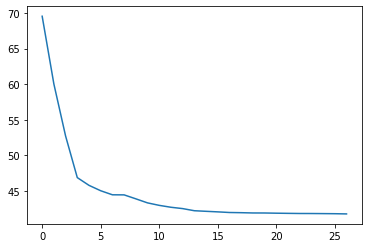

In [96]:
plot_log_func(log, 'energy')


In [37]:
np.sort(np.log(Y))

array([8.87204880e-02, 1.28508561e-01, 1.49657110e-01, 1.52861958e-01,
       2.04896773e-01, 2.28931062e-01, 2.88283534e-01, 3.46486699e-01,
       3.55325325e-01, 3.66921017e-01, 3.69517229e-01, 3.79037414e-01,
       3.79486313e-01, 3.89145157e-01, 4.02511084e-01, 4.14095500e-01,
       4.17907294e-01, 4.29104557e-01, 4.34194456e-01, 4.96975983e-01,
       5.19360477e-01, 5.31249660e-01, 5.64720122e-01, 5.89205350e-01,
       5.95665992e-01, 5.96921707e-01, 6.01564522e-01, 6.34518399e-01,
       6.37384862e-01, 6.42136663e-01, 6.48928772e-01, 6.58119296e-01,
       6.68321226e-01, 6.71442775e-01, 6.82011679e-01, 7.00729209e-01,
       7.30216837e-01, 7.49235866e-01, 7.52937004e-01, 7.59241222e-01,
       7.60676737e-01, 7.64069660e-01, 7.65372309e-01, 7.71567406e-01,
       7.89869768e-01, 8.03344632e-01, 8.20299828e-01, 8.24804742e-01,
       8.54428005e-01, 8.66453099e-01, 8.76106240e-01, 8.99952213e-01,
       9.33855111e-01, 9.44877934e-01, 9.44922837e-01, 9.61115553e-01,
      

In [95]:
width = 1000
height = 1000
def gen_checkers(n_checkers_x, n_checkers_y, width=256, height=256):
    # tex dims need to be power of two.
    array = np.ones((width, height, 3), dtype='float32')

    # width in texels of each checker
    checker_w = width / n_checkers_x
    checker_h = height / n_checkers_y

    for y in range(height):
        for x in range(width):
            color_key = int(x / checker_w) + int(y / checker_h)
            if color_key % 2 == 0:
                array[x, y, :] = [ 1., 1.0, 1.0 ]
            else:
                array[x, y, :] = [ 0.5, 0.5, 0.5 ]
    return array
tex = gen_checkers(50,50,width,height)

## Scale Distortion Energy

In [3]:
def lambdas_from_mesh(C):
    proj, embed = build_refl_proj(C)
    he2e, e2he = build_edge_maps(C)
    return 2*np.log(C.l)[np.array(e2he)[embed]]


In [3]:
data_dir = "../data/paper/"
#data_dir = "../data/open-Myles/"
#data_dir = "../data/closed-Myles/"

m = 'bumpy_torus'
#m = 'eight'
#m = 'hand'
m = 'julius'
#m = 'raptor50K'
v, f = igl.read_triangle_mesh(data_dir+'/'+m+'.obj')
Th_hat = np.loadtxt(data_dir+"/"+m+'_Th_hat',dtype=float)
#Th_hat = map_to_disk(v,f)
C, vtx_reindex = fv_to_double(v, f, Th_hat, False)
proj, embed = build_refl_proj(C)
he2e, e2he = build_edge_maps(C)
proj = np.array(proj)
embed = np.array(embed)
he2e = np.array(he2e)
e2he = np.array(e2he)
lambdas_target = lambdas_from_mesh(C)
lambdas_init = lambdas_from_mesh(C)
lambdas = lambdas_target


In [5]:
lambdas_dir = '../output/paper/metric-dist-normal/bumpy_torus_checkpoint/lambdas'
lambdas_dir = '../output/paper/closed-Myles-opt/'+m+'_checkpoint/lambdas'
lambdas_dir = '../output/paper/perturb/'+m+'_1_lambdas/lambdas_proj'
lambdas_dir = '../output/paper/scale_dist/'+m+'_checkpoint/lambdas_proj'
#lambdas_dir = '../output/paper/open-Myles-opt/'+m+'_checkpoint/lambdas'
lambdas = np.loadtxt(lambdas_dir,dtype=float)



OSError: ../output/paper/scale_dist/raptor50K_checkpoint/lambdas_proj not found.

In [48]:

lambdas, u = project_to_constraint(C, lambdas_init, ProjectionParameters())

Error: 6.26343e-10


In [42]:
np.max(np.abs(lambdas- lambdas_conf))

3.3008239627812905

In [43]:
np.max(np.abs(u))

1.650471788201284

In [26]:
len(lambdas), len(lambdas_target)

(50445, 50445)

In [27]:
m_o, _, _, reindex, V_overlay = optimize_metric(v, f, Th_hat, [], [], C, lambdas, [])



Flips: 17286
Angle error: 3.19321e-09


In [28]:
u = np.zeros_like(Th_hat)
ap = AlgorithmParameters()
lp = LineSearchParameters()
sp = StatsParameters()
hcp.conformal_parametrization_cl_double(v, f, Th_hat, ap, lp, sp)


#v_opt, f_opt, u_param, v_param, ft_opt = hcp.hanxiai_conformal_parametrization_vf_double(v, f, Th_hat, m_o, u,
#                                                                                reindex, V_overlay, ap, lp, sp)




NameError: name 'hcp' is not defined

In [25]:
#m_o, _, _, reindex, _ = optimize_metric(v, f, Th_hat, [], [], C, lambdas, [])

v_opt, f_opt, u_param, v_param, ft_opt = layout_lambdas(v, f, Th_hat, C, lambdas, [])
#v_opt, f_opt, u_param, v_param, ft_opt = layout_float(v, f, Th_hat, C, lambdas, [])
v_opt = np.array(v_opt)
f_opt = np.array(f_opt)
uv_cut_opt = np.array([u_param, v_param]).T
ft_opt = np.array(ft_opt)
v_cut_opt = np.zeros((len(uv_cut_opt),3),dtype=np.float64)
v_cut_opt[ft_opt] = v_opt[f_opt]
uv_opt = np.zeros((len(v_opt),2),dtype=np.float64)
uv_opt[f_opt] = uv_cut_opt[ft_opt]



Flips: 68
Angle error: 3.25838
Flips: 68
Angle error: 3.25838


In [5]:
cam_info = cpp_viewer(v, f, Th_hat, 1, 1,256, 256, False)


In [63]:
cam_info[6].shape

AttributeError: 'list' object has no attribute 'shape'

In [5]:
W = 2560
H = 1600
bd_thick = 2
sin_size = 3
cut=True
(view, proj, vp), v_cuts, f_cuts, red_size, blue_size, fid_mat, bc_mat = cpp_viewer(v, f, Th_hat, sin_size, bd_thick*1.2, W, H, cut)
cam = (view, proj, vp)
with open('../data/cameras/julius_camera.pickle', 'wb') as fp:
    pickle.dump(cam, fp)
    pickle.dump(v_cuts, fp)
    pickle.dump(f_cuts, fp)
    pickle.dump(red_size, fp)
    pickle.dump(blue_size, fp)

In [3]:
cam

NameError: name 'cam' is not defined

In [73]:
with open('../data/bumpy_torus_camera.pickle', 'wb') as file:
    pickle.dump(cam_info[0], file)
    pickle.dump(np.array(cam_info[6]), file)
    pickle.dump(np.array(cam_info[5]), file)

In [55]:
with open('../data/bumpy_torus_camera.pickle', 'rb') as file:
    a = pickle.load(file)
    b = pickle.load(file)
    c = pickle.load(file)
len(a), b.shape, c.shape

(3, (256, 256, 3), (256, 256))

In [52]:
b.shape, c.shop

(256, 256, 3)

In [66]:
np.sqrt(13160)

114.71704319759989

In [41]:
a

(array([[ 9.8971643e-02,  0.0000000e+00, -9.1939956e-02, -5.6281096e-05],
        [ 9.0260396e-04,  1.3507991e-01,  9.7163639e-04, -1.6648269e-04],
        [ 9.1935530e-02, -1.3261867e-03,  9.8966867e-02, -5.0000024e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
       dtype=float32),
 array([[ 1.5088835,  0.       ,  0.       ,  0.       ],
        [ 0.       ,  2.4142134,  0.       ,  0.       ],
        [ 0.       ,  0.       , -1.020202 , -2.020202 ],
        [ 0.       ,  0.       , -1.       ,  0.       ]], dtype=float32),
 array([   0.,    0., 2560., 1600.], dtype=float32))

In [34]:
len(cam_info[6])

256

In [54]:
with open('../data/cameras/bumpy_torus_camera_old.pickle', 'rb') as file:
    a = pickle.load(file)
    b = pickle.load(file)
    c = pickle.load(file)

len(a), b.shape,c.shape

(3, (13160, 3), (23372, 3))

In [32]:
pickle.cam_info

((array([[ 1.0553743e-01, -9.4141528e-10, -8.8360444e-02, -5.7493453e-05],
         [-4.5948126e-10,  1.3764344e-01, -2.0152922e-09, -1.6959966e-04],
         [ 8.8360444e-02,  1.8401801e-09,  1.0553743e-01, -5.0000014e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
        dtype=float32),
  array([[ 1.5088835,  0.       ,  0.       ,  0.       ],
         [ 0.       ,  2.4142134,  0.       ,  0.       ],
         [ 0.       ,  0.       , -1.020202 , -2.020202 ],
         [ 0.       ,  0.       , -1.       ,  0.       ]], dtype=float32),
  array([   0.,    0., 2560., 1600.], dtype=float32)),
 array([], shape=(0, 3), dtype=float64),
 array([], shape=(0, 3), dtype=int32),
 0,
 0,
 [[-1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,
   -1,

In [ ]:
RenderInfo(pt_fids, pt_bcs, fid_mat, bc_mat, cam, bd_thick, view, proj, H, W)

In [49]:
#m_o, _, _, reindex, _ = optimize_metric(v, f, Th_hat, [], [], C, lambdas, [])

v_opt, f_opt, u_param, v_param, ft_opt = layout_lambdas(v, f, Th_hat, C, lambdas, [])
#v_opt, f_opt, u_param, v_param, ft_opt = layout_float(v, f, Th_hat, C, lambdas, [])
v_opt = np.array(v_opt)
f_opt = np.array(f_opt)
uv_cut_opt = np.array([u_param, v_param]).T
ft_opt = np.array(ft_opt)
v_cut_opt = np.zeros((len(uv_cut_opt),3),dtype=np.float64)
v_cut_opt[ft_opt] = v_opt[f_opt]
uv_opt = np.zeros((len(v_opt),2),dtype=np.float64)
uv_opt[f_opt] = uv_cut_opt[ft_opt]




Flips: 121
Angle error: 6.26342e-10


In [50]:
# Plot the results
bd_v = igl.boundary_loop(ft_opt)
vw = plot.Viewer(dict(width=width, height=height))
vw.add_mesh(v_cut_opt,
                 ft_opt,
                 uv=uv_cut_opt,
                 #shading={"wireframe": True, "flat": False},
                 shading={"wireframe": False, "flat": False},
                 texture_data=tex)
#vw.add_lines(v_cut_opt[bd_v[:-1]], v_cut_opt[bd_v[1:]], shading={"line_color": "red", "line_width": 20})
#vw.add_lines(v_cut_opt[bd_v[-1]], v_cut_opt[bd_v[0]], shading={"line_color": "red", "line_width": 20})
display(vw._renderer)

p = plot.plot(uv_cut_opt,
             ft_opt,
#             uv=uv_cut_opt,
             shading={"wireframe": True, "flat": False})
p.add_lines(uv_cut_opt[bd_v[:-1]], uv_cut_opt[bd_v[1:]], shading={"line_color": "red"})
p.add_lines(uv_cut_opt[bd_v[-1]], uv_cut_opt[bd_v[0]], shading={"line_color": "red"})




Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.0,…

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0716840…

2